<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/develop/DM_clustering_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Introduction

Based on the user’s profile explore the dataset using various clustering techniques. Carefully describe your decisions for each algorithm and which are the advantages provided by the different approaches.

Subtasks:

● Clustering Analysis by K-means:
1. Identification of the best value of $k$
2. Characterization of the obtained clusters by using both analysis of
the $k$ centroids and comparison of the distribution of variables within
the clusters and that in the whole dataset
3. Evaluation of the clustering results

● Analysis by density-based clustering:
1. Study of the clustering parameters
2. Characterization and interpretation of the obtained clusters

● Analysis by hierarchical clustering
1. Compare different clustering results got by using different version of
the algorithm
2. Show and discuss different dendrograms using different algorithms

● Final evaluation of the best clustering approach and comparison of the clustering
obtained

● Optional (2 points): Explore the opportunity to use alternative clustering
techniques in the library: https://github.com/annoviko/pyclustering/

# Setup

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
if not os.path.isdir('already_downloaded'):
  users_df_id = "1aw--B6vc79j9Gvn1c0V_YVXasD6orsiH"
  
  !gdown $users_df_id

  try:
    os.mkdir('already_downloaded')
  except:
    pass

Downloading...
From: https://drive.google.com/uc?id=1aw--B6vc79j9Gvn1c0V_YVXasD6orsiH
To: /content/users_new_.csv
100% 3.19M/3.19M [00:00<00:00, 206MB/s]


In [ ]:
max_rows = 0

if max_rows != 0:
  df = pd.read_csv("./users_new_.csv", index_col='user_id', nrows=max_rows)
else:
  df = pd.read_csv("./users_new_.csv", index_col='user_id')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,name,lang,bot,subscription_date,statuses_count,number_of_tweets,tweets_2019,tweets_2020,likes_sum,likes_mean,...,number_of_special_chars,len_all_tweets,mean_special_char,num_hashtags_mean,num_hashtags_max,num_urls_mean,num_urls_max,num_mentions_mean,num_mentions_max,user_number_of_retweets
user_id,,,,,,,,,,,,,,,,,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,127,127,0,5,0.039370,...,479,8202,0.058400,0.102362,3.0,0.000000,0.0,0.283465,1.0,0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,119,119,0,6,0.050420,...,392,8367,0.046851,0.033613,1.0,0.000000,0.0,0.344538,1.0,0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,4,0,0,0,0.000000,...,19,77,0.246753,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1394,1393,0,254,0.182209,...,6589,123587,0.053315,0.083214,9.0,0.026542,2.0,0.006456,3.0,6
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,3535,0,3535,218,0.061669,...,10785,263532,0.040925,0.135219,4.0,0.004809,2.0,0.522772,6.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11508 non-null  object 
 1   lang                            11508 non-null  object 
 2   bot                             11508 non-null  int64  
 3   subscription_date               11508 non-null  object 
 4   statuses_count                  11508 non-null  float64
 5   number_of_tweets                11508 non-null  int64  
 6   tweets_2019                     11508 non-null  int64  
 7   tweets_2020                     11508 non-null  int64  
 8   likes_sum                       11508 non-null  int64  
 9   likes_mean                      11508 non-null  float64
 10  likes_max                       11508 non-null  int64  
 11  ratio_num_likes_and_num_tweets  11508 non-null  float64
 12  time_delta_sec     

In [ ]:
df['name'].fillna(value="UNKNOWN", inplace=True)

# Preprocessing for clustering

## Selecting users
In order to extract meaningful information about groups of users representing a certain behavior, we thought it was necessary that they must have written a minimum number of tweets equal to 10.

In [ ]:
print("Original dataset has ", len(df), "users")
df = df[df.number_of_tweets > 10]
print("Now have", len(df), "users")

Original dataset has  11508 users
Now have 11076 users


In [ ]:
original_df = df.copy()

## Removing categorical data


In [ ]:
df.columns

Index(['name', 'lang', 'bot', 'subscription_date', 'statuses_count',
       'number_of_tweets', 'tweets_2019', 'tweets_2020', 'likes_sum',
       'likes_mean', 'likes_max', 'ratio_num_likes_and_num_tweets',
       'time_delta_sec', 'favorite_count_entropy', 'num_hashtags_entropy',
       'created_at_entropy', 'mean_length', 'number_of_special_chars',
       'len_all_tweets', 'mean_special_char', 'num_hashtags_mean',
       'num_hashtags_max', 'num_urls_mean', 'num_urls_max',
       'num_mentions_mean', 'num_mentions_max', 'user_number_of_retweets'],
      dtype='object')

In [ ]:
categorical_columns = ['subscription_date','name', 'lang', 'bot']

categorical_features = df[categorical_columns] # save categorical data to join them later
df = df.drop(categorical_columns, axis=1)

## Selecting features


We plot feature distributions because we want to exclude flattened distributions (in light of the fact that we only want indicators that are meaningful).

In [ ]:
df.corr()

,statuses_count,number_of_tweets,tweets_2019,tweets_2020,likes_sum,likes_mean,likes_max,ratio_num_likes_and_num_tweets,time_delta_sec,favorite_count_entropy,...,number_of_special_chars,len_all_tweets,mean_special_char,num_hashtags_mean,num_hashtags_max,num_urls_mean,num_urls_max,num_mentions_mean,num_mentions_max,user_number_of_retweets
statuses_count,1.000000,0.493148,0.039061,0.585797,0.006204,-0.020512,0.016061,-0.020512,-0.112816,0.151890,...,0.363605,0.450270,0.100189,0.019444,0.058271,0.164281,0.249994,0.304693,0.384517,0.420094
number_of_tweets,0.493148,1.000000,0.572672,0.684831,0.028195,-0.038576,0.046359,-0.038576,-0.280067,0.379594,...,0.669203,0.955377,0.088842,0.004965,0.157580,0.363542,0.527986,0.335333,0.610409,0.607008
tweets_2019,0.039061,0.572672,1.000000,-0.148514,0.001742,-0.037010,0.012338,-0.037010,-0.190818,0.219091,...,0.398882,0.635831,-0.003649,-0.035882,0.106772,0.362775,0.266497,-0.191706,0.018406,-0.029392
tweets_2020,0.585797,0.684831,-0.148514,1.000000,0.006197,-0.032413,0.018811,-0.032413,-0.170252,0.276686,...,0.441333,0.569189,0.103304,0.022423,0.097978,0.086732,0.355453,0.544622,0.658668,0.752237
likes_sum,0.006204,0.028195,0.001742,0.006197,1.000000,0.841823,0.676216,0.841823,-0.016700,0.158007,...,0.027924,0.038524,0.013871,0.033120,0.002031,0.106819,0.120627,0.096216,0.069684,0.065617
likes_mean,-0.020512,-0.038576,-0.037010,-0.032413,0.841823,1.000000,0.679667,1.000000,0.011031,0.147625,...,-0.016532,-0.028722,0.013751,0.049533,-0.006483,0.125331,0.106913,0.052317,0.022638,0.016224
likes_max,0.016061,0.046359,0.012338,0.018811,0.676216,0.679667,1.000000,0.679667,-0.015406,0.144125,...,0.033589,0.051115,0.014246,0.038147,0.008377,0.137828,0.129006,0.080624,0.082314,0.065129
ratio_num_likes_and_num_tweets,-0.020512,-0.038576,-0.037010,-0.032413,0.841823,1.000000,0.679667,1.000000,0.011031,0.147625,...,-0.016532,-0.028722,0.013751,0.049533,-0.006483,0.125331,0.106913,0.052317,0.022638,0.016224
time_delta_sec,-0.112816,-0.280067,-0.190818,-0.170252,-0.016700,0.011031,-0.015406,0.011031,1.000000,-0.169655,...,-0.182325,-0.268429,0.015255,0.014743,-0.048595,0.075134,-0.140708,-0.126012,-0.194922,-0.160051
favorite_count_entropy,0.151890,0.379594,0.219091,0.276686,0.158007,0.147625,0.144125,0.147625,-0.169655,1.000000,...,0.179175,0.358303,-0.040565,0.002461,0.059175,-0.016400,0.283938,0.257130,0.419107,0.210823


In [ ]:
# Very Important Features
vif = ["likes_sum", "number_of_tweets", "user_number_of_retweets", "time_delta_sec"]

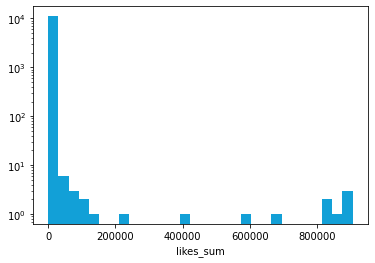

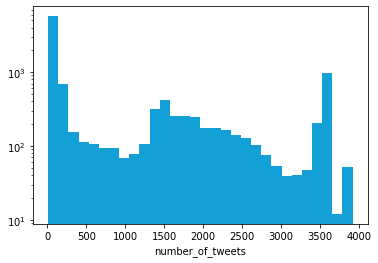

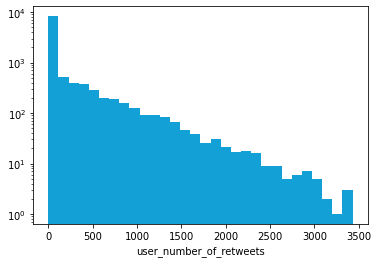

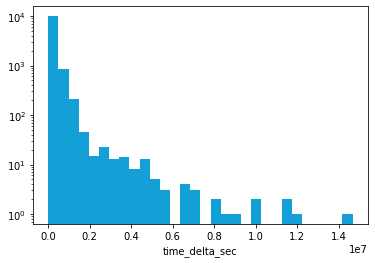

In [ ]:
for feature in vif:
  plt.hist(df[feature], bins=30, color='#12A0D7')
  plt.yscale('log')
  plt.xlabel(feature)
  plt.xticks()
  plt.show()

In [ ]:
df = df[vif]

## Normalization

### Log Transformation

In [ ]:
df.head()

,likes_sum,number_of_tweets,user_number_of_retweets,time_delta_sec
user_id,,,,
2353593986,5,127,0,85354.357143
2358850842,6,119,0,91048.762712
466124818,254,1394,6,56108.470208
2571493866,218,3535,0,2947.256933
2199062688,1462,1989,930,13778.998994


In [ ]:
for column in df.columns:
  df[column] = df[column].apply(lambda x: np.log(x+1))

In [ ]:
finalDf = df 

### Scaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(finalDf.values)

# to normalize the data
# pay attention to pass the values of the dataframe and not the entire dataframe. We do not want the name of the columns
scaled_values = scaler.transform(finalDf.values)

df_scaled = pd.DataFrame(scaled_values, columns=finalDf.columns)

# K-MEANS
K-Means is a simple and efficent algorithm for clustering.

In order to use this algorithm we need to fix $k$, the number of cluster. This value will be found using the Knee method, using an external library : KneeLocator


Knee Method to estimate the best K

In [ ]:
sse_list = list()
sil_list = list()
k_list = list()
max_k = 15
for k in range(2, max_k + 1, 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(scaled_values)
    sse = kmeans.inertia_
    sse_list.append(sse)
    sil = silhouette_score(scaled_values, kmeans.labels_)
    sil_list.append(sil)
    k_list.append(k)
    print("k = ", k, "\t\t| sse=", sse, "\t\t| silhouette_score=", sil)

k =  2 		| sse= 858.3103364296182 		| silhouette_score= 0.6312041479925835
k =  3 		| sse= 546.1074212449196 		| silhouette_score= 0.5991261700720342
k =  4 		| sse= 423.9083392775092 		| silhouette_score= 0.5131194327133516
k =  5 		| sse= 340.64416280572533 		| silhouette_score= 0.5122388663826801
k =  6 		| sse= 278.575084295185 		| silhouette_score= 0.5258903302989655
k =  7 		| sse= 234.29851777523325 		| silhouette_score= 0.5392366330334611
k =  8 		| sse= 198.5179935483808 		| silhouette_score= 0.5219044314034149
k =  9 		| sse= 181.53326133575234 		| silhouette_score= 0.5181101603160146
k =  10 		| sse= 167.88141862078868 		| silhouette_score= 0.4938240849168652
k =  11 		| sse= 157.14692834295747 		| silhouette_score= 0.4837193808798209
k =  12 		| sse= 150.18582601867448 		| silhouette_score= 0.47721332178894516
k =  13 		| sse= 143.1952351040626 		| silhouette_score= 0.48219317432702885
k =  14 		| sse= 137.77357596329819 		| silhouette_score= 0.46957211879781036
k =  15 		|

In [ ]:
def knee_method(x_ax, y_ax, direction='increasing', labelx="", labely="", returnX=True):
  knee = KneeLocator(x_ax, y_ax, S=1, curve='convex', direction=direction, interp_method='polynomial')

  fig = plt.figure(figsize=(5, 5))
  knee.plot_knee()
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.grid()
  plt.show()
  return knee.knee

<Figure size 360x360 with 0 Axes>

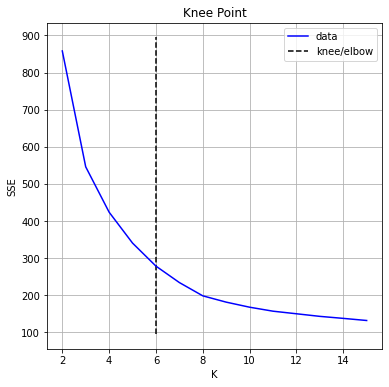

Best K is  6


In [ ]:
best_k = knee_method(k_list, sse_list, "decreasing", "K", "SSE", True)
print("Best K is ", best_k)

Based on the sse score we noted that the best k to choose is 6

In [ ]:
n_clusters=best_k

kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
kmeans.fit(scaled_values)

KMeans(max_iter=100, n_clusters=6)

In [ ]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 2154, 1: 968, 2: 1383, 3: 2394, 4: 3653, 5: 524}

**Inertia**

It is a value that we want to minimize.

The K-means algorithm aims to choose centroids that minimise the inertia, we see the sum of the square error

In [ ]:
kmeans.inertia_

278.5751255324308

In [ ]:
# show also the centroids in the plot
column_headers = list(finalDf.columns) # Using list(df) to get the column headers as a list

# converts centroids to original space
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [ ]:
colors = ["#00B896","#8AA8A0","#6274F8","#212245","#DD962C","#6E5E5E"]

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
label_colored = []
for item in kmeans.labels_:
   label_colored.append(colors[item])

In [ ]:
from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

In [ ]:
string = ""
for cluster_id, theColor in zip(np.unique(kmeans.labels_), colors):
  left, word = 'Cluster '+str(cluster_id)+' '+str(theColor), '■■■■■■■■■■■■'
  string += cstr(' '.join([left, cstr(word, color=theColor)])) +"<br>"
html_print(string)

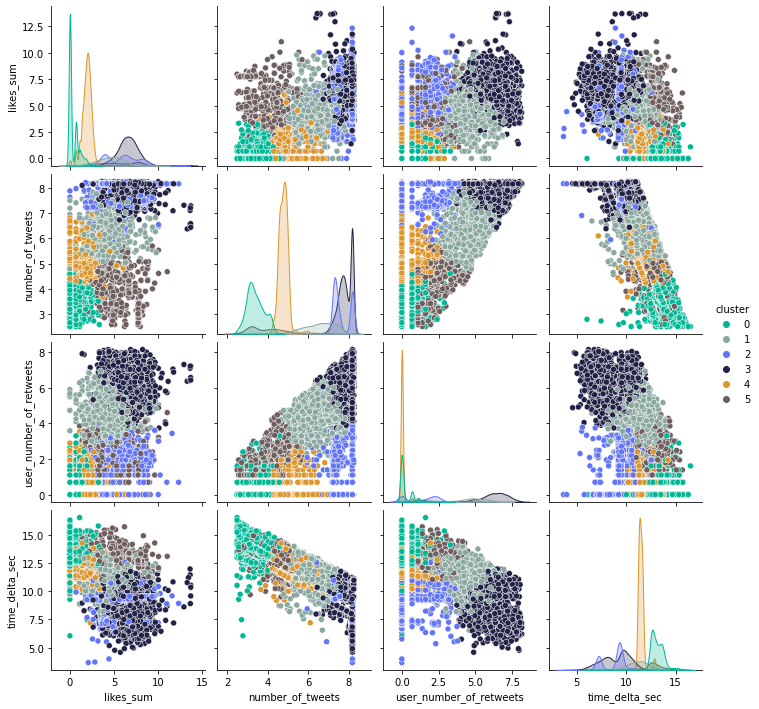

In [ ]:
import seaborn as sns
finalDf["cluster"] = kmeans.labels_

#f, ax = plt.subplots(figsize=(7, 8))

sns.pairplot(data = finalDf, hue = "cluster", palette=sns.color_palette(colors))
finalDf.drop(columns='cluster', inplace=True)

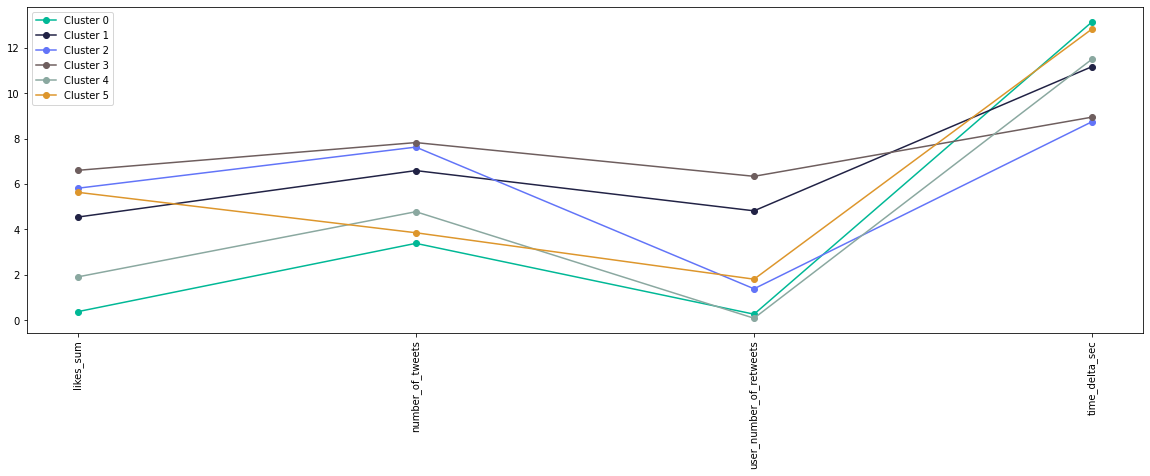

In [ ]:
# understand how the clusters differ from each other

plt.figure(figsize=(20, 6))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i, c=np.unique(label_colored)[i])
plt.tick_params(axis='both', which='major', labelsize=10, )
plt.xticks(range(0, len(finalDf.columns)), finalDf.columns,  fontsize=10)
plt.legend(fontsize=10)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


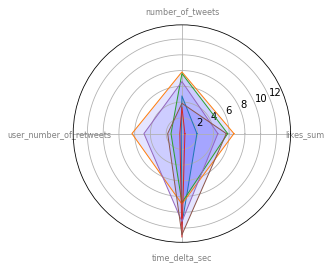

In [ ]:
from math import pi
 
# number of variable
N = len(df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
plt.show()

SSE and Clustering Validation

In [ ]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(scaled_values, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(scaled_values, kmeans.labels_))

SSE 278.5849366514201
Silhouette 0.5253646046740057
Separation 0.8573443419426314


Reinsert categorical features

In [ ]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11076 entries, 2353593986 to 933183398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_date  11076 non-null  object
 1   name               11076 non-null  object
 2   lang               11076 non-null  object
 3   bot                11076 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 432.7+ KB


In [ ]:
bot = pd.crosstab(kmeans.labels_,categorical_features['bot'])
bot
#0 -> 92+1292 = 1,384 -> 000000 -> black
#1 -> 1140+2511 = 3,651 -> 0000ff -> blu
#2 -> 2212+163 = 2,375 -> 00ff00 -> green
#3 -> 898+86 = 984 -> ff0000 -> red
#4 -> 674+1479 = 2,153 -> ff00ff -> magenta
#5 -> 243+286 = 529 -> 00ffff -> cyano

bot,0,1
row_0,,
0,1142,2511
1,2226,164
2,91,1292
3,675,1479
4,886,85
5,239,286


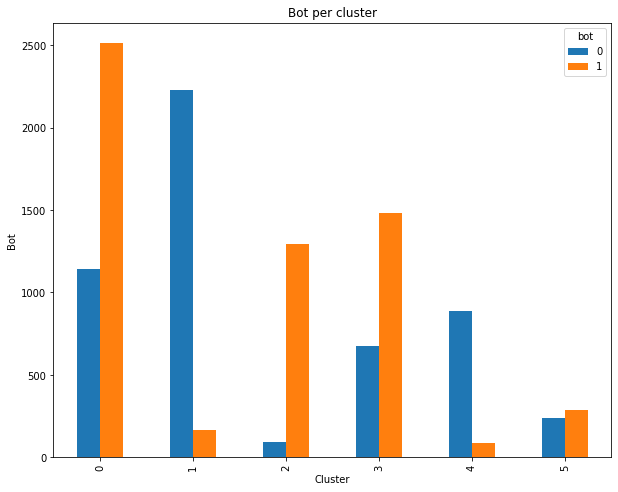

In [ ]:
bot.plot(kind='bar', stacked=False,
                   title='Bot per cluster',
         figsize=(10, 8))
plt.xlabel('Cluster')
plt.ylabel('Bot')
plt.show()

# DBSCAN

DBSCAN is a clustering technique which can cluster any shape. It is a widely used algorithm and only relies on two parameters *epsilon* and *minimum samples*.

* Epsilon ($\epsilon$), is a distance parameter; in particular it's the measure of the radius from a given point that define a perimeter around it. 
* Minimum Samples is the minimum number of points needed to create a cluster.



In [ ]:
# import useful libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

Check the optimal value of Epsilon using K-NN
The optimal value for epsilon is the point with maximum curvature.

In [ ]:
min_samples = 11

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(df_scaled)

distances, indices = neighbors.kneighbors(df_scaled)
distances = np.sort(distances[:,min_samples-1], axis=0)

<Figure size 360x360 with 0 Axes>

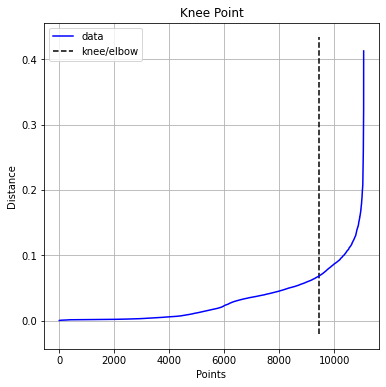

Best epsilon is  0.06786996676756109


In [ ]:
# Showing the best K
i = np.arange(len(distances))
best_k = knee_method(x_ax=i, y_ax=distances, direction="increasing",
                     labelx="Points", labely="Distance", returnX=False)
epsilon = distances[best_k]
print("Best epsilon is ", epsilon)

Applying DBSCAN with Optimal value of Epsilon

In [ ]:
optimal_value = round(epsilon, 3)
print("Optimal Value of Epsilon ", optimal_value)

dbscan_cluster = DBSCAN(eps=optimal_value, min_samples=50)
dbscan_cluster.fit(scaled_values)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

hist, bins = np.histogram(dbscan_cluster.labels_, 
                          bins=range(0, len(set(dbscan_cluster.labels_))))

print("Clusters ", dict(zip(bins, hist)))

print("silhouette: ", silhouette_score(scaled_values, dbscan_cluster.labels_))

Optimal Value of Epsilon  0.068
Estimated no. of clusters: 8
Estimated no. of noise points: 2378
Clusters  {0: 3336, 1: 1996, 2: 130, 3: 432, 4: 1537, 5: 747, 6: 164, 7: 356}
silhouette:  0.3876546916379948


Visualizing DBSCAN

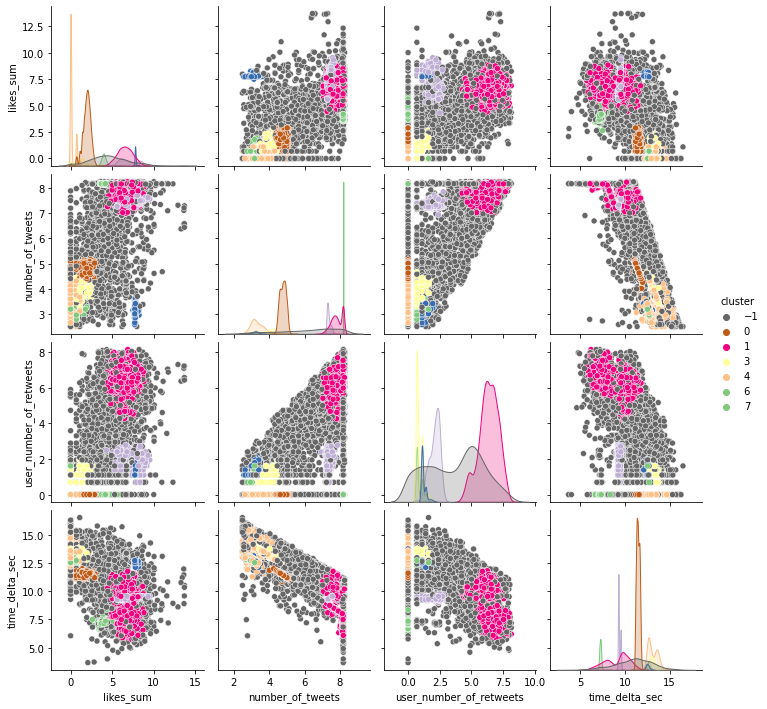

In [ ]:
finalDf["cluster"] = dbscan_cluster.labels_

#f, ax = plt.subplots(figsize=(7, 8))

sns.pairplot(data = finalDf, hue = "cluster", palette = "Accent_r")
finalDf.drop(columns='cluster', inplace=True)

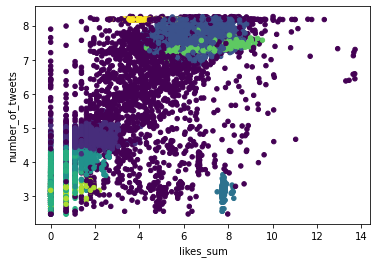

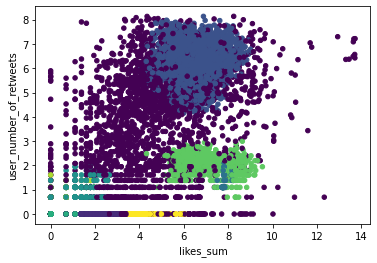

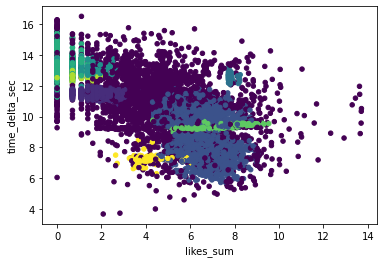

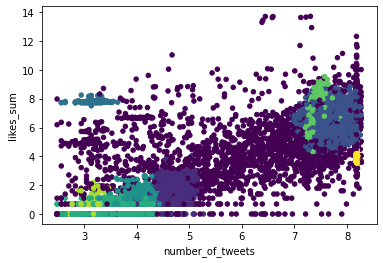

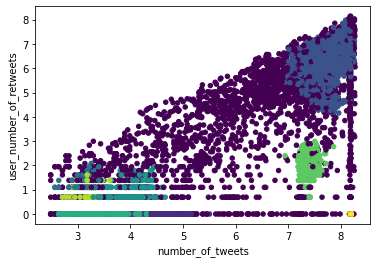

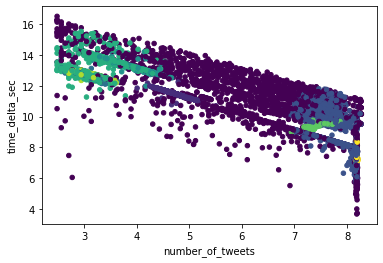

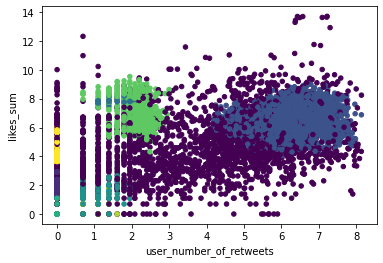

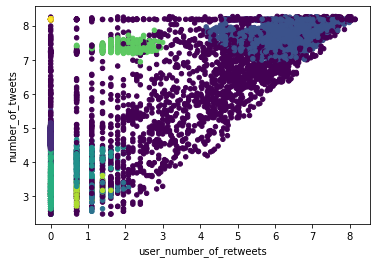

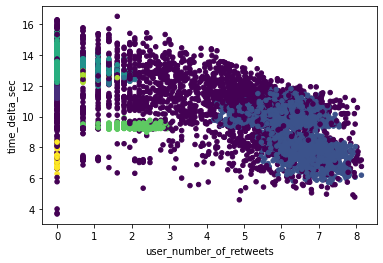

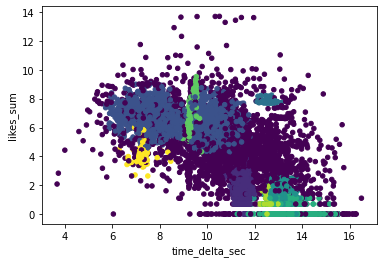

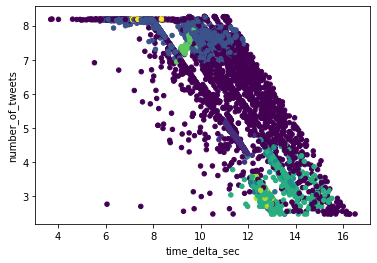

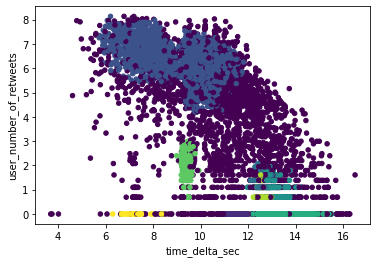

In [ ]:
for column_x in finalDf.columns:
  for column_y in finalDf.columns:
    if column_x!=column_y:

      index_x = column_headers.index(column_x)
      index_y = column_headers.index(column_y)

      plt.scatter(finalDf[column_x], finalDf[column_y], c=dbscan_cluster.labels_, s=20)
      plt.tick_params(axis='both', which='major')
      plt.xlabel(column_x)
      plt.ylabel(column_y)
      plt.show()

# Hierarchical Clustering

This is a clustering approach that aims to build a hierarchy of clusters. The result can be visualized by a plot called *dendogram*.

This algorithm is based on a linkage function, a function that describes the distance between two clusters. This function can be executed using different methods.


## Method Ward 

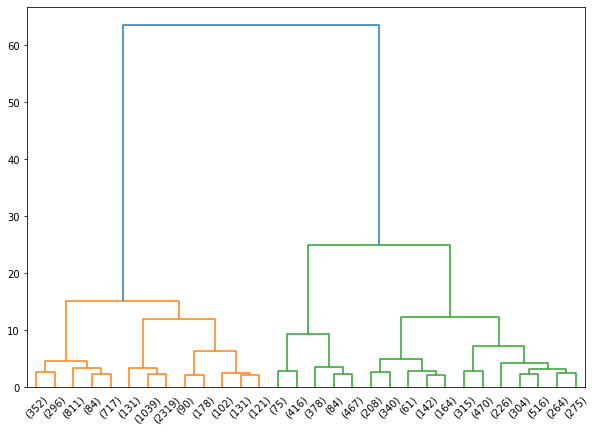

In [ ]:
fig = plt.figure(figsize=(10,7))
data_dist = pdist(scaled_values, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=25, truncate_mode='lastp')

We can see a big jump, this means that we definitely have two clusters that are very different from each other.


In [ ]:
data_link[-3:, 2]

array([15.21956321, 24.88955377, 63.58259535])

In [ ]:
num_of_clusters = 2

In [ ]:
clustering_labels_ward = fcluster(data_link, num_of_clusters, criterion='maxclust')

In [ ]:
ward_sil = silhouette_score(scaled_values, clustering_labels_ward, metric = "euclidean")
print("Silhouette score (Ward):", ward_sil)

Silhouette score (Ward): 0.6290223153737213


In [ ]:
theMap = {}

for i in range(num_of_clusters):
  counters = {}
  counters["bot"]=0
  counters["no_bot"]=0
  theMap[i+1] = counters

for index, cluster in enumerate(clustering_labels_ward):
  bot = original_df.iloc[index]['bot']
  if(bot == 0):
      theMap[cluster]["bot"] = theMap[cluster]["bot"]+1
  else:
      theMap[cluster]["no_bot"] = theMap[cluster]["no_bot"]+1
theMap

{1: {'bot': 2093, 'no_bot': 4278}, 2: {'bot': 3166, 'no_bot': 1539}}

## Method Average

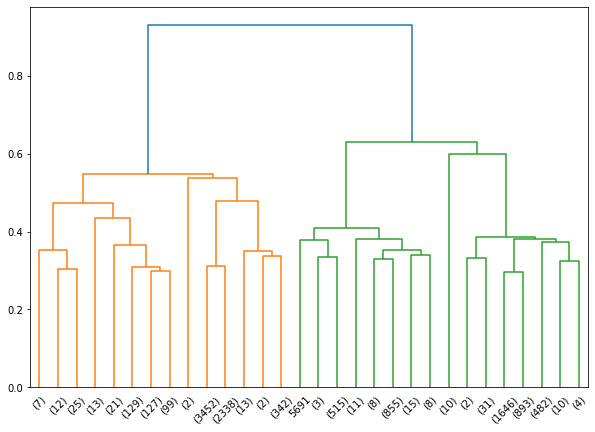

In [ ]:
fig = plt.figure(figsize=(10,7))
data_dist = pdist(scaled_values, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [ ]:
num_of_clusters = 2

In [ ]:
clustering_labels_ward = fcluster(data_link, num_of_clusters, criterion='maxclust')

In [ ]:
avg_sil = silhouette_score(scaled_values, clustering_labels_ward, metric = "euclidean")
print("Silhouette score (Avg):", avg_sil)

Silhouette score (Avg): 0.6205687915459227


In [ ]:
theMap = {}

for i in range(num_of_clusters):
  counters = {}
  counters["bot"]=0
  counters["no_bot"]=0
  theMap[i+1] = counters

for index, cluster in enumerate(clustering_labels_ward):
  bot = original_df.iloc[index]['bot']
  if(bot == 0):
      theMap[cluster]["bot"] = theMap[cluster]["bot"]+1
  else:
      theMap[cluster]["no_bot"] = theMap[cluster]["no_bot"]+1
theMap

{1: {'bot': 2273, 'no_bot': 4309}, 2: {'bot': 2986, 'no_bot': 1508}}

## Method complete

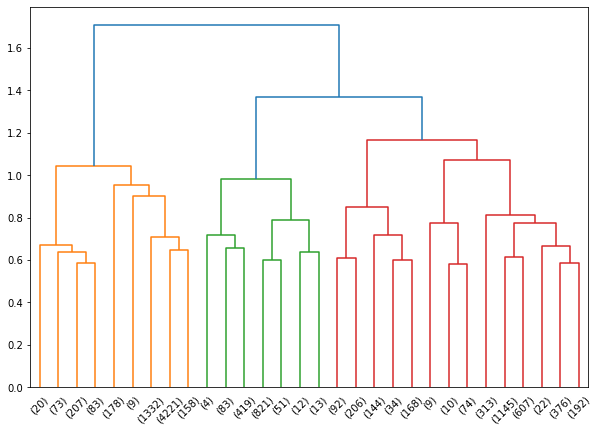

In [ ]:
fig = plt.figure(figsize=(10,7))
data_dist = pdist(scaled_values, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [ ]:
num_of_clusters = 3

In [ ]:
clustering_labels_ward = fcluster(data_link, num_of_clusters, criterion='maxclust')

In [ ]:
compl_sil = silhouette_score(scaled_values, clustering_labels_ward, metric = "euclidean")
print("Silhouette score (Complete):", compl_sil)

Silhouette score (Complete): 0.5949004657263187


In [ ]:
theMap = {}

for i in range(num_of_clusters):
  counters = {}
  counters["bot"]=0
  counters["no_bot"]=0
  theMap[i+1] = counters

for index, cluster in enumerate(clustering_labels_ward):
  bot = original_df.iloc[index]['bot']
  if(bot == 0):
      theMap[cluster]["bot"] = theMap[cluster]["bot"]+1
  else:
      theMap[cluster]["no_bot"] = theMap[cluster]["no_bot"]+1
theMap

{1: {'bot': 2024, 'no_bot': 4257},
 2: {'bot': 104, 'no_bot': 1299},
 3: {'bot': 3131, 'no_bot': 261}}

## Hierarchical Clustering: Conclusions

In [ ]:
print("Silhouette score (Ward):", ward_sil)
print("Silhouette score (Avg):", avg_sil)
print("Silhouette score (Single):", compl_sil)

Silhouette score (Ward): 0.6290223153737213
Silhouette score (Avg): 0.6205687915459227
Silhouette score (Single): 0.5949004657263187


# X-MEANS


In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster.xmeans import xmeans, splitting_type

In [ ]:
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
data = df_scaled.values
initial_centers = kmeans_plusplus_initializer(data, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 40.
xmeans_instance = xmeans(data=data, initial_centers=initial_centers, tolerance=0.1, kmax=20, criterion = splitting_type.BAYESIAN_INFORMATION_CRITERION)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

In [ ]:
cls = {}
for i, elem in enumerate(clusters):
  print(elem)
  cls[i]=len(elem)

print(cls)

[18, 48, 105, 145, 163, 170, 206, 209, 283, 284, 336, 349, 383, 393, 417, 431, 443, 450, 451, 459, 474, 488, 505, 507, 589, 613, 644, 657, 673, 718, 720, 752, 757, 758, 763, 868, 871, 898, 901, 939, 1015, 1041, 1055, 1129, 1135, 1150, 1197, 1311, 1324, 1363, 1401, 1408, 1417, 1432, 1446, 1458, 1480, 1500, 1545, 1546, 1553, 1617, 1666, 1671, 1695, 1816, 1817, 1820, 1880, 1982, 1989, 2068, 2088, 2090, 2114, 2179, 2181, 2185, 2204, 2265, 2387, 2406, 2412, 2478, 2520, 2530, 2537, 2557, 2648, 2697, 2705, 2743, 2756, 2795, 2887, 2910, 2915, 2949, 3032, 3033, 3094, 3132, 3177, 3192, 3193, 3198, 3267, 3270, 3280, 3351, 3359, 3366, 3376, 3402, 3413, 3459, 3472, 3480, 3538, 3566, 3571, 3585, 3620, 3635, 3669, 3726, 3735, 3758, 3760, 3782, 3784, 3834, 3839, 3849, 3887, 3934, 3956, 3961, 3965, 3987, 4002, 4025, 4040, 4053, 4066, 4150, 4151, 4205, 4221, 4247, 4292, 4326, 4350, 4370, 4421, 4439, 4448, 4473, 4485, 4530, 4546, 4565, 4572, 4586, 4593, 4601, 4629, 4643, 4667, 4683, 4709, 4713, 4774, 477

<Figure size 1440x504 with 0 Axes>

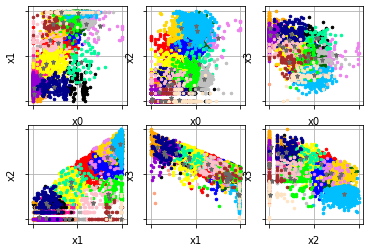

In [ ]:
# Visualize clustering results
fig = plt.figure(figsize=(20,7))
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data.tolist())
visualizer.append_cluster(centers, None, marker='*', markersize=5)
visualizer.show(max_row_size=3)

In [ ]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents)

principalDf

,0,1,2
0,-0.306668,0.093972,-0.025966
1,-0.310796,0.087059,-0.011520
2,0.212463,0.182573,0.062155
3,0.211981,0.535054,0.007801
4,0.711976,-0.169254,0.035203
...,...,...,...
11071,0.251515,-0.117978,-0.012702
11072,0.496294,-0.154323,-0.133354
11073,0.547908,-0.067486,-0.002054
11074,-0.322090,0.069322,0.022778


Point '[0.38258379 0.33622103 0.23771418]' is similar to objects with indexes '[72, 83, 346, 380, 444, 659, 670, 733, 749, 783, 869, 978, 1012, 1069, 1120, 1127, 1319, 1697, 1787, 1900, 2029, 2051, 2121, 2194, 2302, 2322, 2444, 2539, 2543, 2581, 2670, 2735, 2818, 2839, 3077, 3113, 3166, 3257, 3525, 3797, 3837, 3943, 4060, 4062, 4080, 4081, 4101, 4135, 4160, 4300, 4303, 4387, 4449, 4631, 4735, 4974, 5001, 5176, 5292, 5488, 5579, 5595, 5627, 5672, 5698, 5727, 5786, 5820, 5855, 5870, 5909, 6105, 6270, 6287, 6310, 6357, 6552, 6602, 6715, 6953, 7138, 7335, 7387, 7434, 7461, 7477, 7587, 7611, 7636, 7641, 7867, 8037, 8347, 8382, 8478, 8540, 8692, 8748, 8892, 8931, 9040, 9130, 9248, 9374, 9482, 9512, 9518, 9779, 9954, 10125, 10133, 10138, 10244, 10337, 10560, 10583, 10612, 10618, 10817]'.
Coordinates of similar objects:
	Point: [0.30985583 0.29529792 0.23974976]
	Point: [0.25735044 0.33505062 0.23057325]
	Point: [0.2838546  0.26530703 0.21270055]
	Point: [0.26763623 0.27795116 0.25068842]
	Poi

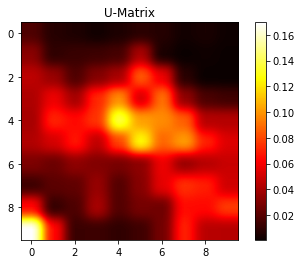

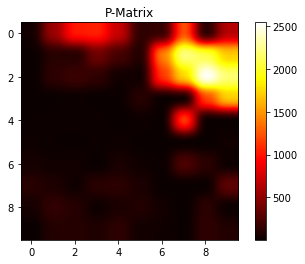

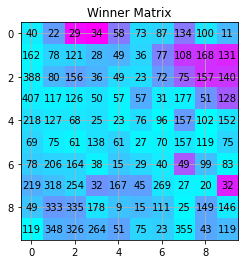

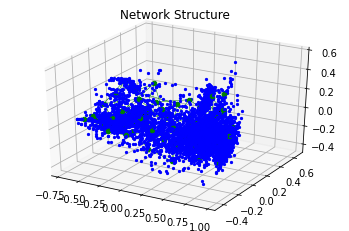

In [ ]:
import random
from pyclustering.utils import read_sample
from pyclustering.nnet.som import som, type_conn, type_init, som_parameters
from pyclustering.samples.definitions import FCPS_SAMPLES

data = principalDf.values
# create SOM parameters
parameters = som_parameters()
# create self-organized feature map with size 7x7
rows = 10  # five rows
cols = 10  # five columns
structure = type_conn.grid_four;  # each neuron has max. four neighbors.
network = som(rows, cols, structure, parameters)
# train network on 'Lsun' sample during 100 epouchs.
network.train(data, 100)
# simulate trained network using randomly modified point from input dataset.
index_point = random.randint(0, len(data) - 1)
point = data[index_point]  # obtain randomly point from data
point[0] += random.random() * 0.2  # change randomly X-coordinate
point[1] += random.random() * 0.2  # change randomly Y-coordinate
index_winner = network.simulate(point)
# check what are objects from input data are much close to randomly modified.
index_similar_objects = network.capture_objects[index_winner]
# neuron contains information of encoded objects
print("Point '%s' is similar to objects with indexes '%s'." % (str(point), str(index_similar_objects)))
print("Coordinates of similar objects:")
for index in index_similar_objects: print("\tPoint:", data[index])
# result visualization:
# show distance matrix (U-matrix).
network.show_distance_matrix()
# show density matrix (P-matrix).
network.show_density_matrix()
# show winner matrix.
network.show_winner_matrix()
# show self-organized map.
network.show_network()